Индивидуальный проект: __Avocado Prices__

Автор: __Варик Александр Юрьевич__

Проверяющий: ФИО

Ссылка на датасет: https://www.kaggle.com/datasets/neuromusic/avocado-prices

__Примерный план выполнения__

__1.Описание набора данных и решаемая задача__



__Цель__: на основе имеющихся данных о продажах авокадо определить зависимость объема продаж и количества сумок от цен.

__2.Описание набора данных__

данные взяты из: https://www.kaggle.com/datasets/neuromusic/avocado-prices

Выборка включает в себя 18249 записей и 14 признаков, заметим что один из признаков это порядковый номер

In [ ]:
# отключим всякие предупреждения Anaconda
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

pd.set_option("display.max.columns", 100)
import pylab as plt

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 8)

In [2]:
df = pd.read_csv('avocado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df=df.sort_values(by='AveragePrice',ascending=False)

In [6]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
14125,8,2016-10-30,3.25,16700.94,2325.93,11142.85,0.00,3232.16,3232.16,0.00,0.00,organic,2016,SanFrancisco
17428,37,2017-04-16,3.17,3018.56,1255.55,82.31,0.00,1680.70,1542.22,138.48,0.00,organic,2017,Tampa
14124,7,2016-11-06,3.12,19043.80,5898.49,10039.34,0.00,3105.97,3079.30,26.67,0.00,organic,2016,SanFrancisco
16055,42,2017-03-12,3.05,2068.26,1043.83,77.36,0.00,947.07,926.67,20.40,0.00,organic,2017,MiamiFtLauderdale
16720,18,2017-08-27,3.04,12656.32,419.06,4851.90,145.09,7240.27,6960.97,279.30,0.00,organic,2017,RaleighGreensboro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,0,2015-12-27,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.00,conventional,2015,PhoenixTucson
15262,44,2017-02-26,0.49,44024.03,252.79,4472.68,0.00,39298.56,600.00,38698.56,0.00,organic,2017,CincinnatiDayton
15473,43,2017-03-05,0.48,50890.73,717.57,4138.84,0.00,46034.32,1385.06,44649.26,0.00,organic,2017,Detroit
7412,47,2017-02-05,0.46,2200550.27,1200632.86,531226.65,18324.93,450365.83,113752.17,330583.10,6030.56,conventional,2017,PhoenixTucson


__Анализ данных__

_Давайте узнаем самую высокую и низкую цену_

In [7]:
topAndBottom=df.iloc[[0,18247],]

In [8]:
topAndBottom

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
14125,8,2016-10-30,3.25,16700.94,2325.93,11142.85,0.00,3232.16,3232.16,0.0,0.00,organic,2016,SanFrancisco
7412,47,2017-02-05,0.46,2200550.27,1200632.86,531226.65,18324.93,450365.83,113752.17,330583.1,6030.56,conventional,2017,PhoenixTucson


In [9]:
top_price=topAndBottom.iloc[0,2]
top_region=topAndBottom.iloc[0,13]
print(f"Самые дорогие авокадо продаются в {top_region} за {top_price} долларов.")

Самые дорогие авокадо продаются в SanFrancisco за 3.25 долларов.


In [10]:
bottom_price=topAndBottom.iloc[1,2]
bottom_region=topAndBottom.iloc[1,13]
print(f"Самые дешевые авокадо продаются в {bottom_region} за {bottom_price} долларов.")

Самые дешевые авокадо продаются в PhoenixTucson за 0.46 долларов.


In [11]:
top_type_avocado=topAndBottom.iloc[0,11]
bottom_type_avocado=topAndBottom.iloc[1,11]
print(f"В {top_region} продаются авокадо типа {top_type_avocado}.")
print(f"В {bottom_region} продаются авокадо типа {bottom_type_avocado}.")

В SanFrancisco продаются авокадо типа organic.
В PhoenixTucson продаются авокадо типа conventional.


In [12]:
print(df.shape)
print(df.columns.values)

(18249, 14)
['Unnamed: 0' 'Date' 'AveragePrice' 'Total Volume' '4046' '4225' '4770'
 'Total Bags' 'Small Bags' 'Large Bags' 'XLarge Bags' 'type' 'year'
 'region']


In [13]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [14]:
df.sort_values(by='Small Bags', ascending=False).head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9097,7,2018-02-04,0.87,62505646.52,21620180.90,20445501.03,1066830.22,19373134.37,13384586.80,5719096.61,269450.96,conventional,2018,TotalUS
8366,47,2017-02-05,0.77,61034457.10,22743616.17,20328161.55,1664383.09,16298296.29,12567155.58,3618270.75,112869.96,conventional,2017,TotalUS
9090,0,2018-03-25,1.03,43409835.75,14130799.10,12125711.42,758801.12,16394524.11,12540327.19,3544729.39,309467.53,conventional,2018,TotalUS
9091,1,2018-03-18,1.05,41386314.12,13707389.51,11061051.69,645380.85,15972492.07,11712807.19,3988101.74,271583.14,conventional,2018,TotalUS
9092,2,2018-03-11,1.09,40449603.12,14089091.05,10758039.45,707578.82,14894893.80,11392828.89,3229556.62,272508.29,conventional,2018,TotalUS


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 14125 to 15261
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.1+ MB


In [16]:
df = pd.read_csv('avocado.csv', index_col=0, parse_dates=['Date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


__Визуальный анализ данных__

Давайте сделаем выводы на основе входных данных, по признаку "type".

In [18]:
df["type"].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

/opt/sagemath-9.3/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only
  """Entry point for launching an IPython kernel.


NameError: name 'plt' is not defined

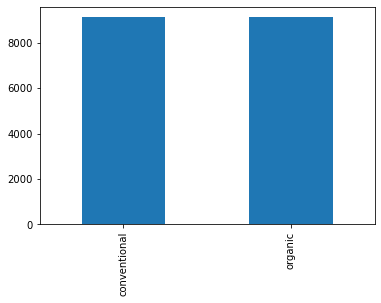

In [19]:
df["type"].value_counts().sort_index(0).plot(kind="bar", label="type")
plt.legend()
plt.title("Количество органического и привычного авокадо");

Из этого графика мы можем сделать вывод что органический авокадо имеет такой-же спрос как и всем привычный

In [36]:
corr_matrix = df.drop(
    ["Date", "AveragePrice", "Total Bags", "type"], axis=1
).corr()

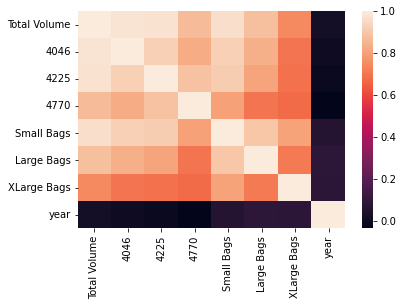

In [37]:
sns.heatmap(corr_matrix);

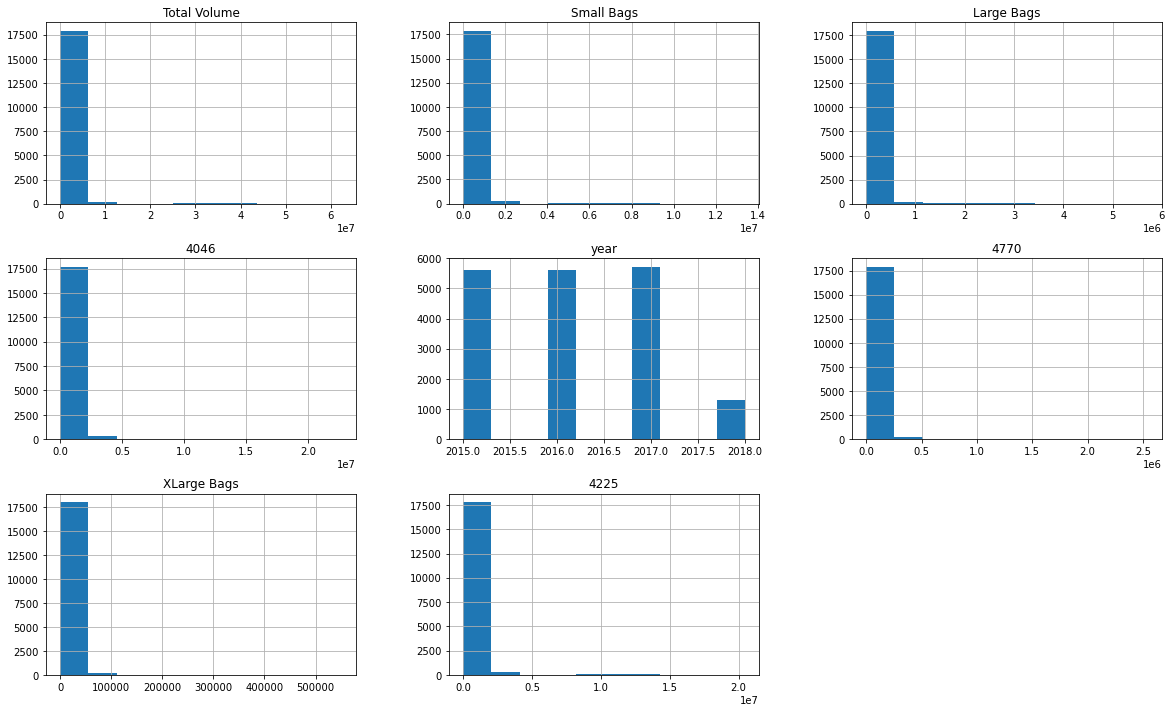

In [40]:
features = list(
    set(df.columns)
    - set(
        [
            "Date",
            "AveragePrice",
            "Total Bags",
            "type",
         
        ]
    )
)

df[features].hist(figsize=(20, 12));

Практически у всех признаков пик в нуле. Исключением является дата.

Нарисуем распределения признаков и диаграммы рассеяния для пар признаков.

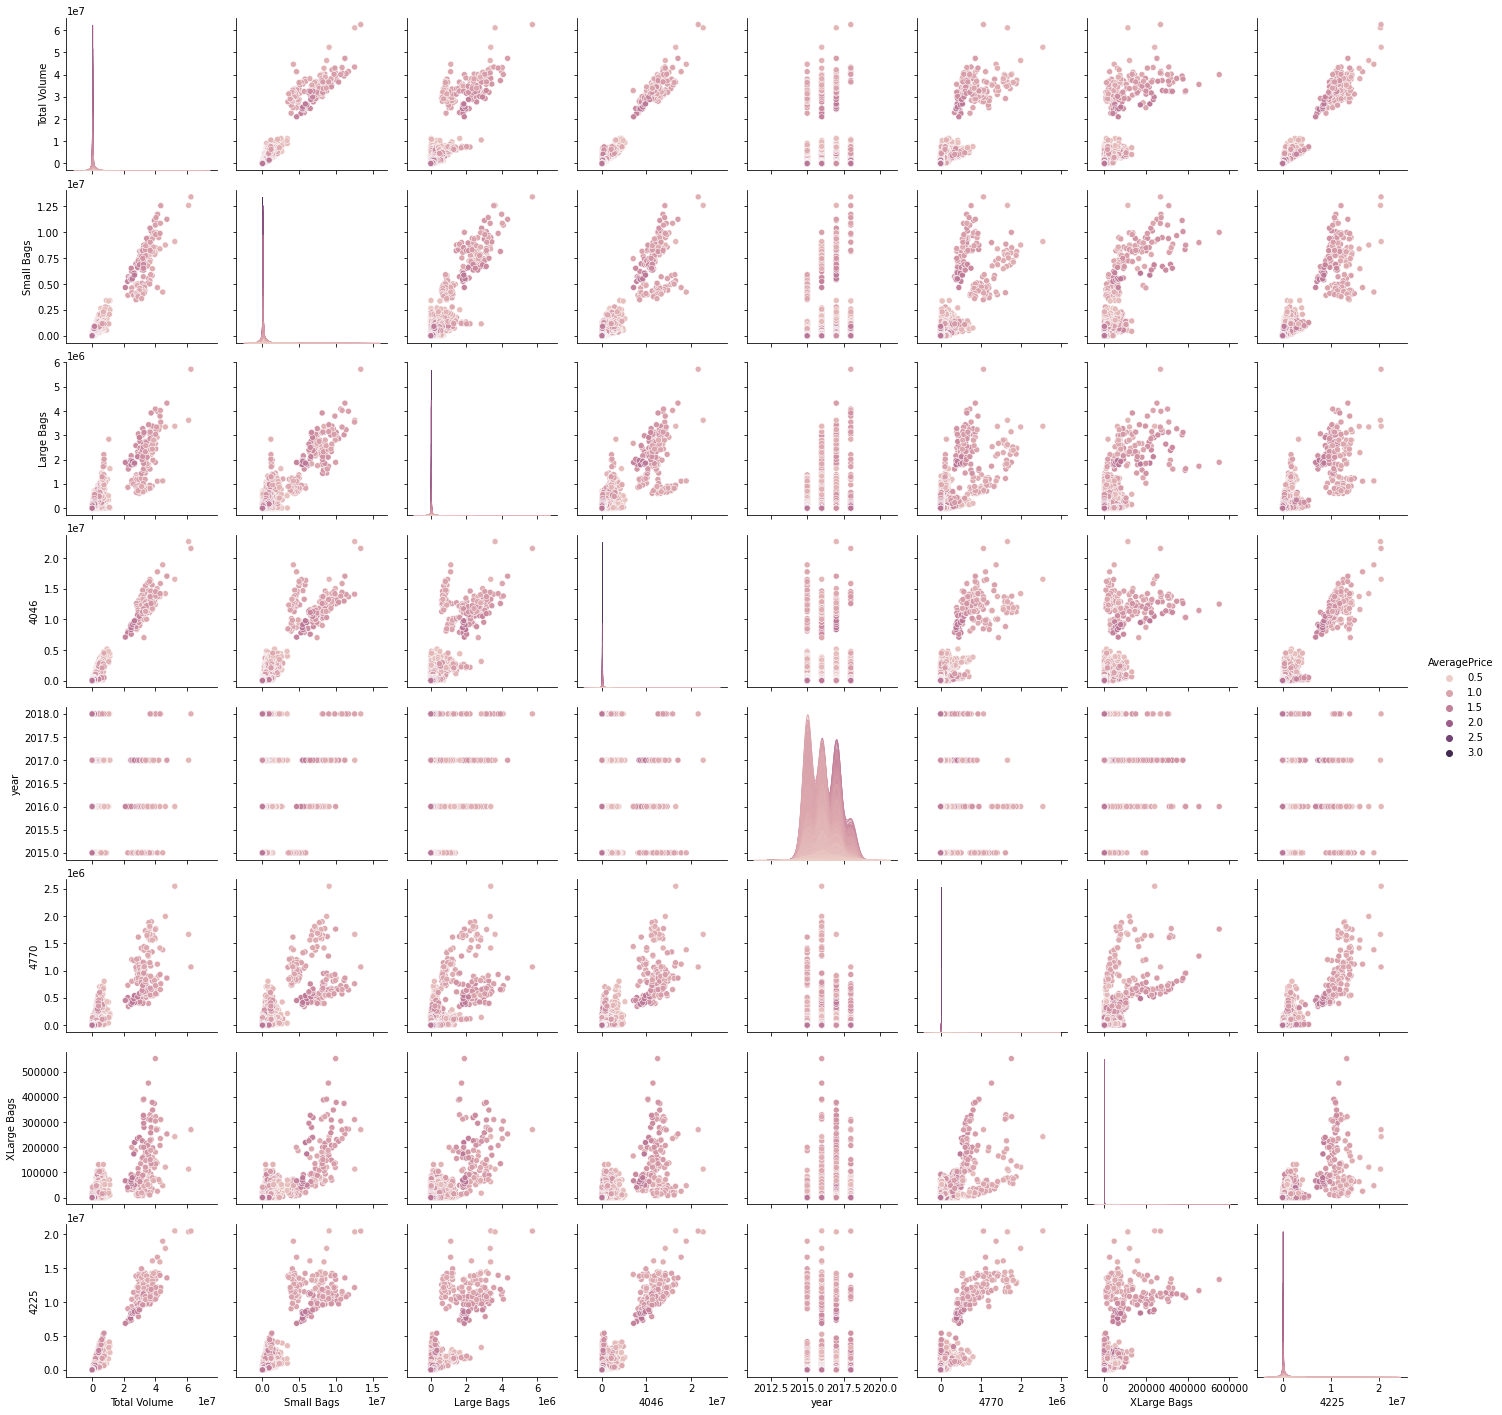

In [42]:
sns.pairplot(df[features + ["AveragePrice"]], hue="AveragePrice");

__Построение новых признаков и их визуальный анализ__

Для начала мы найдем общую картину: средняя цена, общий объем, и общее количество сумок.

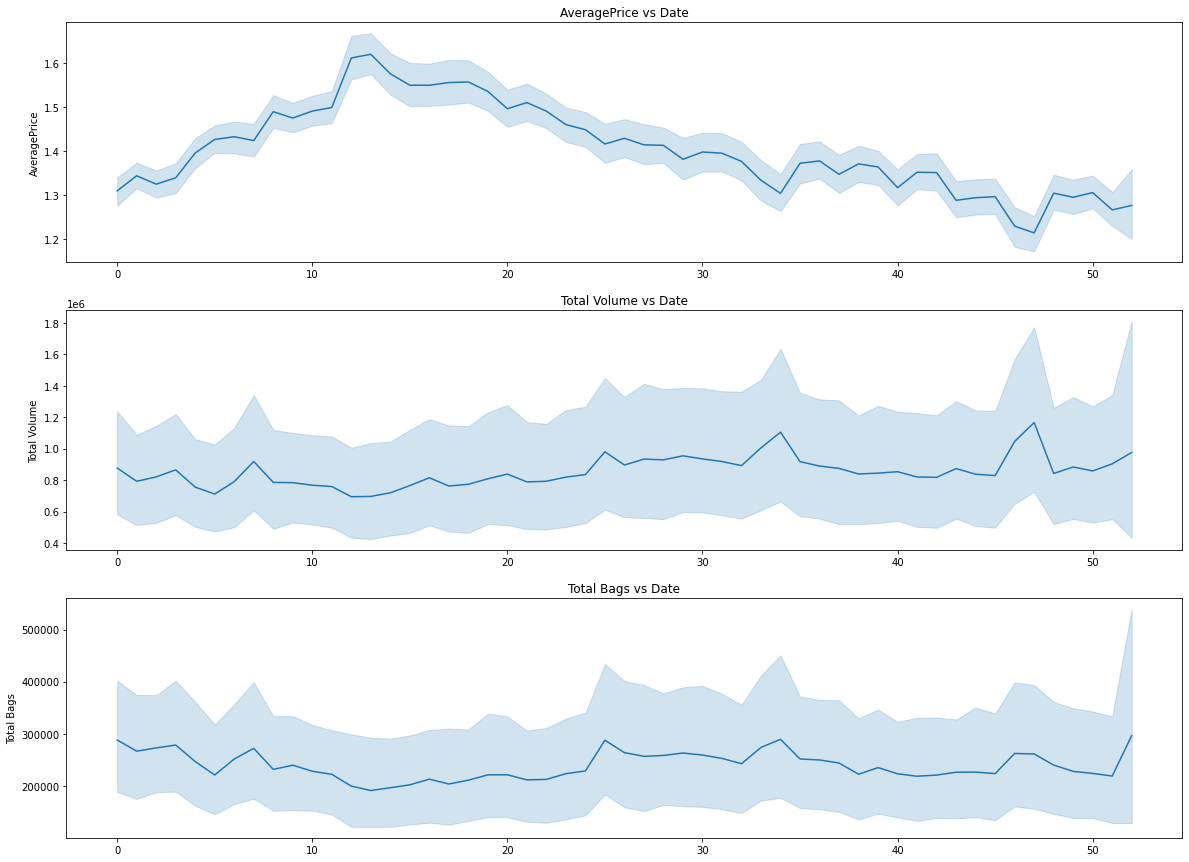

In [28]:
l1 = ['AveragePrice','Total Volume','Total Bags']
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (20,15))
for i in range(len(l1)):
    
    plt.subplot(3,1,i+1)
    sns.lineplot(x = df.index,y = l1[i],data = df)
    title = l1[i] + ' vs Date'
    plt.title(title);

Из этих графиков можно сделать вывод что общий объем и общее количество сумок пропорциональны, а средняя цена им обратно пропорциональна.
 Такой вывод можно сделать основываясь на законах экономики 
    Если предложение увеличится, а спрос останется прежним, цена упадет.
    Если предложение уменьшится, а спрос останется прежним, цена будет расти.

__Вывод__

В процессе выполнения данной работы были изучены и использованы данные о продажах авокадо в америке. 

Были применены способы работы с большими объемами данных и библиотеки для машинного обучения на языке python. Отточены навыки изучения и анализа большого объёма информации.